In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
train_data = pd.read_csv('train (1).csv')

# Check the first few rows of the dataset
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# Fill missing 'Age' with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the mode (most frequent value)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column because of too many missing values
train_data.drop(columns=['Cabin', 'Ticket'], inplace=True)

# Convert 'Sex' and 'Embarked' to numeric format using label encoding
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [4]:
# Verify that there are no more missing values
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# Exploratory Data Analysis (EDA)


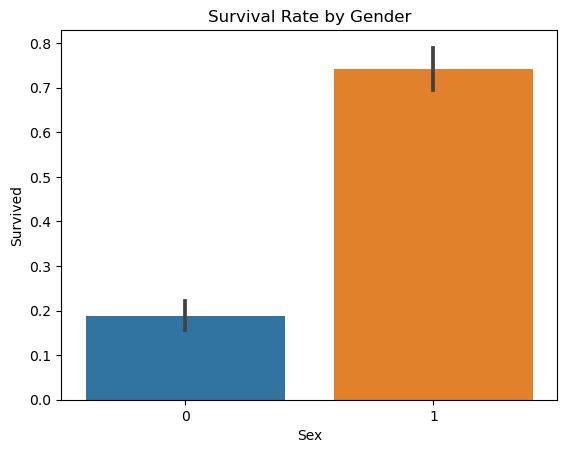

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()


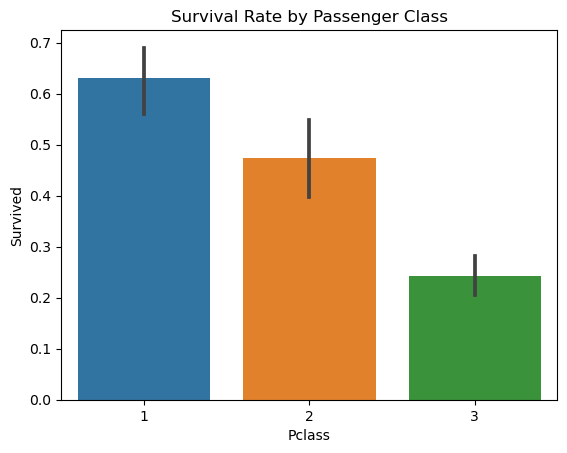

In [7]:
# Plot survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()


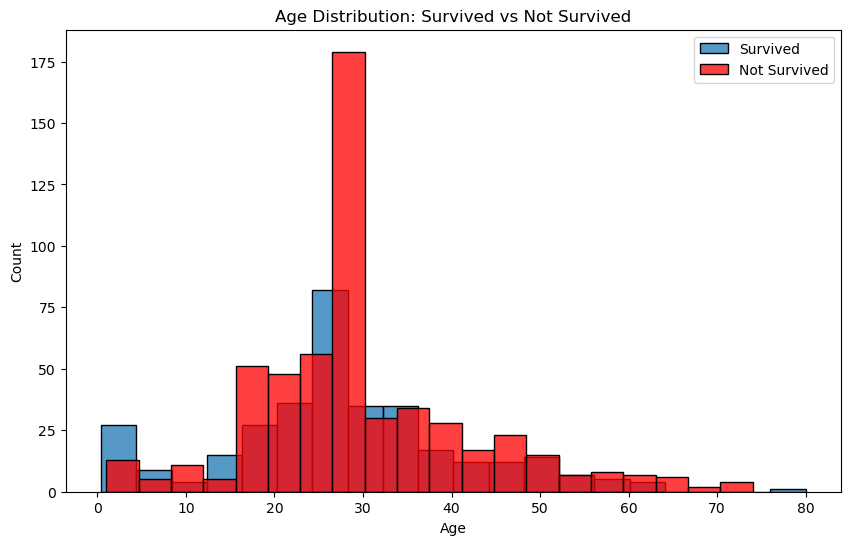

In [8]:
# Plot the age distribution of survivors and non-survivors
plt.figure(figsize=(10,6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], bins=20, label='Survived', kde=False)
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], bins=20, label='Not Survived', kde=False, color='red')
plt.legend()
plt.title('Age Distribution: Survived vs Not Survived')
plt.show()


# Feature Engineering

In [10]:
# Create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Dropping 'Name' and 'PassengerId' since they may not add value to predictions
train_data.drop(columns=['Name', 'PassengerId'], inplace=True)

# Verify the new feature
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0,22.0,1,0,7.2500,0,2
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,1


# Building a Machine Learning Model

In [12]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = train_data.drop(columns='Survived')
y = train_data['Survived']

# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Training a Logistic Regression model:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 0.7989


# Training a RandomForestClassifier model:

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and calculate accuracy
rf_pred = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')


Random Forest Accuracy: 0.8212


# Model Evaluation

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for logistic regression
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("Classification Report:\n", classification_report(y_val, y_pred))


Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



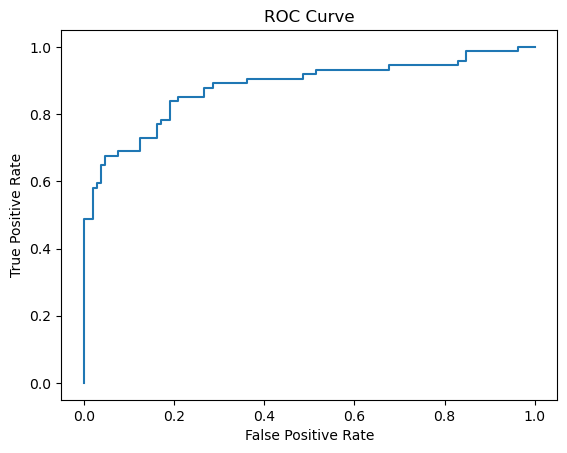

AUC Score: 0.8807


In [19]:
# ROC Curve and AUC Score 
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for the ROC curve
y_prob = model.predict_proba(X_val)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_val, y_prob)
print(f'AUC Score: {auc_score:.4f}')

